# Edit distance

D:\program64\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


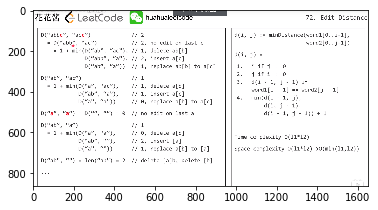

In [2]:
fname = 'C:/Users/1/Desktop/editDistance.png'
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import imread #这是一个图像处理的函数
picture =  imread(fname)
plt.figure(1)
plt.imshow(picture)

思路可以参考OneNote的笔记。
Besides，视频讲解：https://www.bilibili.com/video/av48541010/![image.png](attachment:image.png)

## 1. 递推方法实现

In [11]:
def levenshtein_edit_distance(s1,s2):
    if len(s1) < len(s2):
        return levenshtein(s2,s1)
    
    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)
    
    previous_row = range(len(s2)+1) #第一行初始化
    for i,c1 in enumerate(s1):
        current_row = [i+1]
        for j,c2 in enumerate(s2):
            insertions = current_row[j] + 1
            deletions = previous_row[j+1] + 1
            substitutions = previous[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]


In [12]:
levenshtein_edit_distance('abcdefg','abctgsft')

4

## 2.递推方法实现2


In [14]:
def levenshtein_2(s, t):
        ''' From Wikipedia article; Iterative with two matrix rows. '''
        if s == t: return 0
        elif len(s) == 0: return len(t)
        elif len(t) == 0: return len(s)
        v0 = [None] * (len(t) + 1)
        v1 = [None] * (len(t) + 1)
        for i in range(len(v0)):
            v0[i] = i
        for i in range(len(s)):
            v1[0] = i + 1
            for j in range(len(t)):
                cost = 0 if s[i] == t[j] else 1
                v1[j + 1] = min(v1[j] + 1, v0[j + 1] + 1, v0[j] + cost)
            for j in range(len(v0)):
                v0[j] = v1[j]
                
        return v1[len(t)]

In [15]:
levenshtein_2('abcdefg','abctgsft')

4

## 3.递归方法实现，思路清晰但效率慢

In [16]:
def lev(a, b):
    if not a: return len(b)
    if not b: return len(a)
    return min(lev(a[1:], b[1:])+(a[0] != b[0]), lev(a[1:], b)+1, lev(a, b[1:])+1)

In [18]:
lev('abcdefg','abctgsft')

4